<a href="https://colab.research.google.com/github/avgalkov/collab-notebooks/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Скачиваем датасет и подгружаем данные

https://www.kaggle.com/datasets/shivan118/churn-modeling-dataset

https://drive.google.com/file/d/1EP5sm12x5yQphvQxgV2j_UlQsMJrcqHi/view?usp=sharing

In [1]:
! gdown --id 1EP5sm12x5yQphvQxgV2j_UlQsMJrcqHi

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1EP5sm12x5yQphvQxgV2j_UlQsMJrcqHi
To: /content/churn_modeling.zip
100% 268k/268k [00:00<00:00, 55.8MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

import seaborn as sns
cm = sns.dark_palette("red", as_cmap=True)

In [3]:
df= pd.read_csv('/content/churn_modeling.zip')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Быстрый анализ данных

In [5]:
df.shape

(10000, 14)

In [7]:
df.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [9]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

## Обучающая, валидационная и тестовые выборки

In [10]:
from sklearn.model_selection import train_test_split

In [35]:
train, test = train_test_split(df,train_size = 0.6, random_state = 42, stratify = df['Exited'])

# random_state = 42  позволяет заморозить наши выборки
# stratify = df['Exited'] - позволяет разбить данные с очень близким показателем долей yfitq wtktdjq gthtvtyyjq Exited

In [24]:
val, test = train_test_split(test,train_size = 0.5, random_state = 42, stratify = test['Exited'])

In [25]:
train['Exited'].mean()

0.20366666666666666

In [26]:
val['Exited'].mean()

0.204

In [27]:
test['Exited'].mean()

0.2035

## Phik

In [29]:
train_full = pd.concat([train, val])

In [30]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0
6727,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1
4745,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1
1307,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0


In [31]:
! pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 17.1 MB/s eta 0:00:00


In [32]:
import phik

In [33]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


/usr/local/lib/python3.8/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


In [37]:
phik_overview['Exited'].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

## Человеческое обучение

In [48]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count','mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [51]:
model = train_full.groupby('NumOfProducts')['Exited'].mean().reset_index()

In [52]:
model = model.rename({'Exited':'score_prod'}, axis = 1)
model

,NumOfProducts,score_prod
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [53]:
train_full = train_full.merge(model, how = 'left', on = 'NumOfProducts')

In [54]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,count,mean,score_prod
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,3673,0.077049,0.077049
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,3673,0.077049,0.077049
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,3673,0.077049,0.077049
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,4060,0.275369,0.275369
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,3673,0.077049,0.077049


## Baseline

In [56]:
train_full['score_mean'] = train_full['Exited'].mean()

In [57]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,count,mean,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,3673,0.077049,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,3673,0.077049,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,3673,0.077049,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,4060,0.275369,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,3673,0.077049,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,4060,0.275369,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,4060,0.275369,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,4060,0.275369,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,3673,0.077049,0.077049,0.20375


In [58]:
from sklearn.metrics import log_loss

In [59]:
log_loss(train_full['Exited'],train_full['score_mean'])

0.5055572860042145

Нам нужно получить ошибку, меньше, чем это число иначе процесс бессмысленный

In [61]:
log_loss(train_full['Exited'],train_full['score_prod'])

0.4359616823203511

## Uplift

In [62]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,count,mean,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,3673,0.077049,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,3673,0.077049,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,3673,0.077049,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,4060,0.275369,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,3673,0.077049,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,4060,0.275369,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,4060,0.275369,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,4060,0.275369,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,3673,0.077049,0.077049,0.20375


In [63]:
# случайные 20 процентов клиентов 

train_full['Exited'].sample(frac=0.2,random_state =42)

2215    0
2582    1
1662    1
3027    0
4343    0
       ..
1079    0
7979    0
1115    0
6093    0
6832    0
Name: Exited, Length: 1600, dtype: int64

In [64]:
train_full['Exited'].sample(frac=0.2,random_state =42).mean()

0.210625

In [65]:
# какой процент отточных клиентов содержится в такой выборке?
exited_all = train_full['Exited'].sum()

In [66]:
train_full['Exited'].sample(frac=0.2,random_state =42).sum()

337

In [67]:
train_full['Exited'].sample(frac=0.2,random_state =42).sum() / exited_all

0.2067484662576687

Получается, что мы взяли 20 процентов случайной выборки и получили, что в ней содержится около 20 процентов всех отточных клиентов

Доля всегда будет пропорциональна размеру взятой выборки, следовательно сортировка такого рода не дает никакого профита

Теперь возьмем выборку из топ 20 процентов по score_prod

In [69]:
train_full = train_full.sort_values('score_prod', ascending = False)

In [70]:
train_full.head(round(len(train_full)*0.2))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,count,mean,score_prod,score_mean
6946,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,48,1.000000,1.000000,0.20375
1245,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,48,1.000000,1.000000,0.20375
7056,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,48,1.000000,1.000000,0.20375
7847,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,48,1.000000,1.000000,0.20375
693,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,48,1.000000,1.000000,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,1590,15617518,Hu,675,Germany,Male,36,7,89409.95,1,1,1,149399.70,0,4060,0.275369,0.275369,0.20375
7270,3716,15640409,Carpenter,817,Germany,Female,46,0,89087.89,1,0,1,87941.85,1,4060,0.275369,0.275369,0.20375
7287,2707,15595071,Ramos,696,France,Male,22,9,149777.00,1,1,1,198032.93,0,4060,0.275369,0.275369,0.20375
7283,9183,15665579,Cartwright,597,France,Female,28,0,142705.95,1,1,0,127233.39,0,4060,0.275369,0.275369,0.20375


Посчитаем сколько отточников в такой выборке

In [72]:
train_full.head(round(len(train_full)*0.2))['Exited'].sum() / exited_all

0.3576687116564417

In [74]:
# рассчитаем наш uplift
0.3576687116564417 / 0.2067484662576687

1.7299703264094954

## Добавим шум

In [75]:
import numpy as np

In [76]:
np.random.seed(42) # фиксируем генерацю рандомных чисел
np.random.uniform(0,0.001, size = len(train_full)) # диапазон от 0 до 0.001

array([0.51477993, 0.13329937, 0.11374555, ..., 0.74029326, 0.62788811,
       0.54049646])

In [77]:
np.random.seed(42)
train_full['score_prod'] = train_full['score_prod'] - np.random.uniform(0,0.001, size = len(train_full))

In [78]:
train_full['score_prod']

6946    0.999625
1245    0.999049
7056    0.999268
7847    0.999401
693     0.999844
          ...   
1742    0.076776
4912    0.076839
4913    0.076593
4914    0.076140
0       0.076944
Name: score_prod, Length: 8000, dtype: float64

Теперь наши скоры уникальные

## Функция для uplift

In [83]:
def uplift(df, score, pct):
    exited_all = df['Exited'].sum()
    df = df.sort_values(score, ascending = False)
    exited_found = df.head(round(len(df) * pct))['Exited'].sum()

    return (exited_found / exited_all) / pct



In [84]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

In [87]:
test = test.merge(model,how='left', on ='NumOfProducts')

In [88]:
# добавим шум 
np.random.seed(42)
test['score_prod'] = test['score_prod'] - np.random.uniform(0,0.001, size = len(test))

In [90]:
log_loss(test['Exited'],test['score_prod'])

0.4349547309366078

In [91]:
uplift(test, 'score_prod', 0.2)

1.7730061349693251

## Добавим возраст

In [108]:
train_full.groupby('NumOfProducts')['Exited'].agg(['count','mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


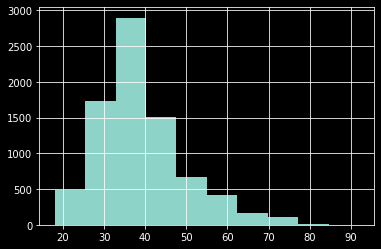

In [109]:
train_full['Age'].hist()

In [110]:
train_full['age_group'] = pd.qcut(train_full['Age'],5)

In [111]:
train_full.groupby('age_group')['Exited'].agg(['count','mean'])

,count,mean
age_group,,
"(17.999, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, 92.0]",1507,0.459854


Будем использовать pd.cut и зададим интервалы вручную, чтобы отсавить возможность применять то же самое к тестовой выборке

In [115]:
train_full['age_group'] = pd.cut(train_full['Age'],[0,31,35,40,46,float('inf')])

In [117]:
model = train_full.groupby(['NumOfProducts','age_group'])['Exited'].mean().reset_index()
model = model.rename({'Exited':'score_prod_age'}, axis = 1)
model

,NumOfProducts,age_group,score_prod_age
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506
5,2,"(0.0, 31.0]",0.029293
6,2,"(31.0, 35.0]",0.031206
7,2,"(35.0, 40.0]",0.059977
8,2,"(40.0, 46.0]",0.106239
9,2,"(46.0, inf]",0.225869


In [119]:
train_full = train_full.merge(model, how = 'left', on = ['NumOfProducts','age_group'])

In [120]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,count,mean,score_prod,score_mean,age_group,score_prod_age
0,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,48,1.0,0.999625,0.20375,"(46.0, inf]",1.0
1,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,48,1.0,0.999049,0.20375,"(35.0, 40.0]",1.0
2,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,48,1.0,0.999268,0.20375,"(46.0, inf]",1.0
3,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,48,1.0,0.999401,0.20375,"(46.0, inf]",1.0
4,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,48,1.0,0.999844,0.20375,"(40.0, 46.0]",1.0


In [ ]:
log_loss(test['Exited'],test['score_prod'])

0.4349547309366078

In [ ]:
uplift(test, 'score_prod', 0.2)

1.7730061349693251

In [122]:
log_loss(train_full['Exited'],train_full['score_prod_age'])

0.3866695862492173

In [123]:
uplift(train_full, 'score_prod_age', 0.2)

2.7116564417177913

проверим на тесте 

In [124]:
test['age_group'] = pd.cut(test['Age'],[0,31,35,40,46,float('inf')])

In [125]:
test = test.merge(model, how = 'left', on = ['NumOfProducts','age_group'])

In [126]:
log_loss(test['Exited'],test['score_prod_age'])

0.3821515870219514

In [127]:
uplift(test, 'score_prod_age', 0.2)

2.7484662576687118

## Добавим IsActiveMember

In [128]:
train_full['IsActiveMember'].value_counts()

1    4131
0    3869
Name: IsActiveMember, dtype: int64

In [130]:
train_full.groupby('IsActiveMember')['Exited'].agg(['count','mean'])

,count,mean
IsActiveMember,,
0,3869,0.267511
1,4131,0.144033


In [132]:
model = train_full.groupby(['NumOfProducts','age_group','IsActiveMember'])['Exited'].mean().reset_index()
model = model.rename({'Exited':'score_prod_age_active'}, axis = 1)
model.head()

,NumOfProducts,age_group,IsActiveMember,score_prod_age_active
0,1,"(0.0, 31.0]",0,0.143885
1,1,"(0.0, 31.0]",1,0.072687
2,1,"(31.0, 35.0]",0,0.177650
3,1,"(31.0, 35.0]",1,0.094286
4,1,"(35.0, 40.0]",0,0.223714


In [133]:
train_full = train_full.merge(model, how = 'left', on = ['NumOfProducts','age_group','IsActiveMember'])

In [134]:
test = test.merge(model, how = 'left', on = ['NumOfProducts','age_group','IsActiveMember'])

In [144]:
def print_metrics(df,score):
    print(log_loss(df['Exited'],df[score]))
    print(uplift(df, score, 0.2))

In [145]:
print_metrics(train_full,'score_prod_age') # проверяем работоспособность

0.3866695862492173
2.7116564417177913


In [146]:
print_metrics(train_full,'score_prod_age_active')

0.36550197514510024
2.8496932515337425


In [147]:
print_metrics(test,'score_prod_age_active')

0.3586887180953559
2.8957055214723924


## Машинное обучение

In [148]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.0 MB/s eta 0:00:00


In [149]:
from catboost import CatBoostClassifier

In [150]:
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'count', 'mean',
       'score_prod', 'score_mean', 'age_group', 'score_prod_age',
       'score_prod_age_active'],
      dtype='object')

In [151]:
X = ['NumOfProducts', 'Age', 'IsActiveMember']
y = ['Exited']

In [167]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [168]:
model = CatBoostClassifier(**params)

In [169]:
model.fit(train[X],train[y], eval_set = (val[X], val[y]))

0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 10.6ms	remaining: 10.5s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 529ms	remaining: 4.71s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 915ms	remaining: 3.64s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 1.39s	remaining: 3.23s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 1.9s	remaining: 2.83s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 2.38s	remaining: 2.37s
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 2.88s	remaining: 1.91s
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 3.12s	remaining: 1.33s
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 3.31s	remaining: 823ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 3.51s	remaining: 386ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 3.71s	remaining: 0us

bestTest = 0.34

дефолный порог преобразования скора в класс = 0.5

In [170]:
model.predict(test[X])

array([0, 0, 0, ..., 0, 0, 0])

In [171]:
model.predict_proba(test[X])

array([[0.89626367, 0.10373633],
       [0.83917143, 0.16082857],
       [0.97346661, 0.02653339],
       ...,
       [0.91530536, 0.08469464],
       [0.8901914 , 0.1098086 ],
       [0.91631281, 0.08368719]])

In [174]:
model.predict_proba(test[X])[:,1] # берем второй столбец

array([0.10373633, 0.16082857, 0.02653339, ..., 0.08469464, 0.1098086 ,
       0.08368719])

In [176]:
test['score_cat_prod_age_active'] = model.predict_proba(test[X])[:,1]

In [177]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active
0,8771,15656901,Nnonso,615,France,Male,59,8,0.00,2,1,1,165576.55,0,0.076674,"(46.0, inf]",0.225869,0.134048,0.103736
1,3910,15726487,P'eng,431,France,Male,63,6,160982.89,1,1,1,168008.17,0,0.274419,"(46.0, inf]",0.542506,0.334016,0.160829
2,9123,15748595,Stanton,689,France,Female,29,1,77556.79,2,1,1,122998.26,0,0.076317,"(0.0, 31.0]",0.029293,0.025692,0.026533
3,924,15601026,Gallagher,572,Germany,Female,19,1,138657.08,1,1,1,16161.82,0,0.274771,"(0.0, 31.0]",0.106774,0.072687,0.022875
4,6125,15643359,Carter,736,Spain,Male,32,7,0.00,1,0,1,79082.62,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.094018


In [179]:
# сравним ошибку

In [180]:
print_metrics(test,'score_prod_age_active')

0.3586887180953559
2.8957055214723924


In [178]:
print_metrics(test,'score_cat_prod_age_active')

0.35021820948905247
2.993865030674846


## Обучимся на всех фичах

In [181]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [182]:
X = ['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

cat_features = ['Geography','Gender']

y = ['Exited']

In [193]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [194]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

In [195]:
model = CatBoostClassifier(**params)

In [196]:
model.fit(train_data, eval_set = valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 13.3ms	remaining: 13.3s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 774ms	remaining: 6.89s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 1.53s	remaining: 6.09s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 2.36s	remaining: 5.47s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 3.13s	remaining: 4.67s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 3.88s	remaining: 3.87s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 4.67s	remaining: 3.1s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 6.06s	remaining: 2.58s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 7.86s	remaining: 1.95s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 8.65s	remaining: 951ms
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 9.4s	remaining: 0us

bestTest = 0.318

In [197]:
test['score_cat_prod_age_active_all_features'] = model.predict_proba(test[X])[:,1]

In [ ]:
# сравним ошибку

In [ ]:
print_metrics(test,'score_cat_prod_age_active')

0.35021820948905247
2.993865030674846


In [198]:
print_metrics(test,'score_cat_prod_age_active_all_features')

0.32405429527710605
3.1963190184049077


## Feature importances

In [203]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,NumOfProducts,27.408724
1,Age,21.567747
2,Balance,11.455919
3,Geography,10.011145
4,IsActiveMember,7.420335
5,EstimatedSalary,5.163513
6,CustomerId,4.965796
7,CreditScore,4.482999
8,Tenure,3.637201
9,Gender,3.089379


In [205]:
# сравним 
phik_overview['Exited'].sort_values(ascending = False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

## Shap